In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
scores = pd.read_csv("scores.csv", sep=";")
scores

,model,mse,r2,rmse
0,LinearRegression,332.882352,0.224768,18.245064
1,XGBoost,304.681965,0.290442,17.455142
2,LightGBMRegressor,288.665699,0.327742,16.990165
3,GradientBoostedRegresion,306.888997,0.285303,17.518248
4,DecisionTreeRegressor,405.204111,0.056342,20.129682
5,RandomForestRegressor,305.751623,0.287951,17.485755


In [11]:
scores['r2']= scores['r2']*100

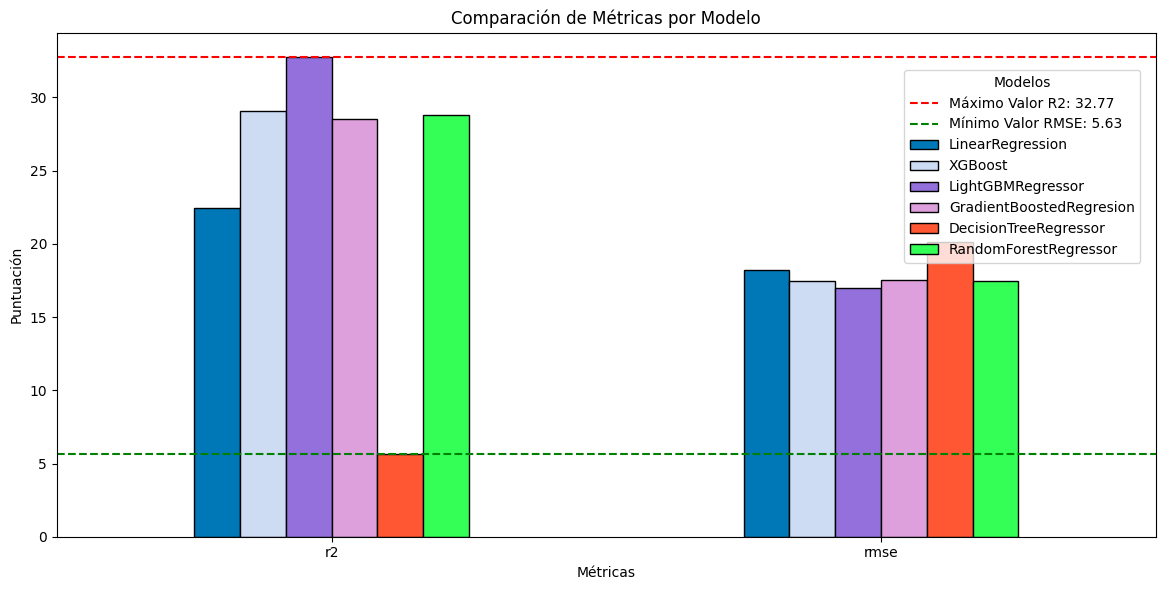

In [12]:
scores.set_index('model', inplace=True)

# Transpone el DataFrame
results_df = scores.T

# Excluye la métrica de MSE del DataFrame
results_df.drop('mse', inplace=True)

# Define los colores para las métricas restantes
colors = ['#0077b6', '#CDDBF3', '#9370DB', '#DDA0DD', '#FF5733', '#33FF57', '#3333FF']

# Grafica el DataFrame con bordes en las barras
ax = results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors, edgecolor='black')

# Líneas de tendencia para el punto máximo y mínimo
max_value = results_df.max().max()
min_value = results_df.min().min()
ax.axhline(y=max_value, color='r', linestyle='--', label=f'Máximo Valor R2: {max_value:.2f}')
ax.axhline(y=min_value, color='g', linestyle='--', label=f'Mínimo Valor RMSE: {min_value:.2f}')

plt.title('Comparación de Métricas por Modelo')
plt.xlabel('Métricas')
plt.ylabel('Puntuación')

# Ajusta la posición de la leyenda
plt.legend(title='Modelos', bbox_to_anchor=(0.765, 0.94), loc='upper left')

plt.tight_layout()
plt.show()